In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder

# EDA

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/ML_Assignment_Dataset_Train.csv')

In [ ]:
# Display basic information about the dataset
print("Basic Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate records
print("\nDuplicate Records:")
print(df.duplicated().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB
None

Summary Statistics:
                                               tweet_text  \
count                                                8588   
unique                                               8561   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique           

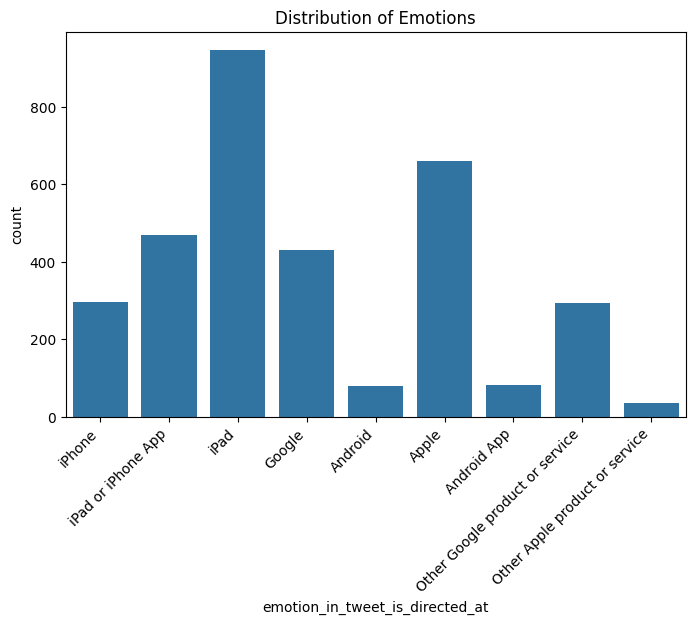

In [ ]:
# Visualize the distribution of emotions
plt.figure(figsize=(8, 5))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.show()

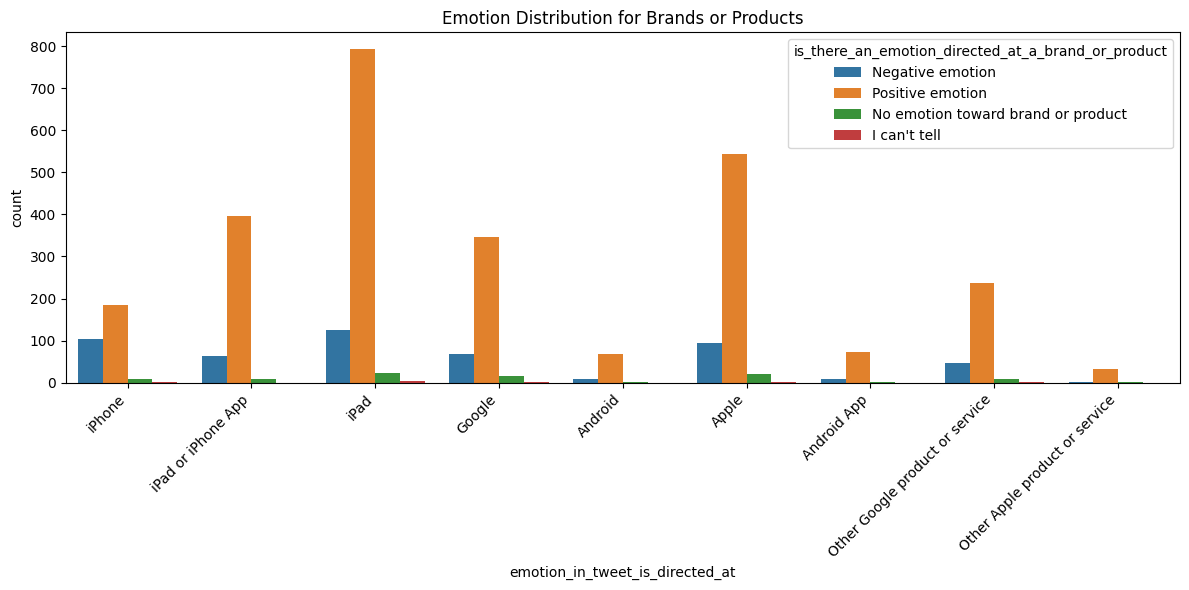

In [ ]:
# Visualize the distribution of emotions directed at brands or products
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Emotion Distribution for Brands or Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

A word cloud is a visualization technique that represents text data in a visual form, where the size of each word indicates its frequency or importance within the given text. In a word cloud, more frequent words appear larger and bolder, while less frequent words appear smaller.

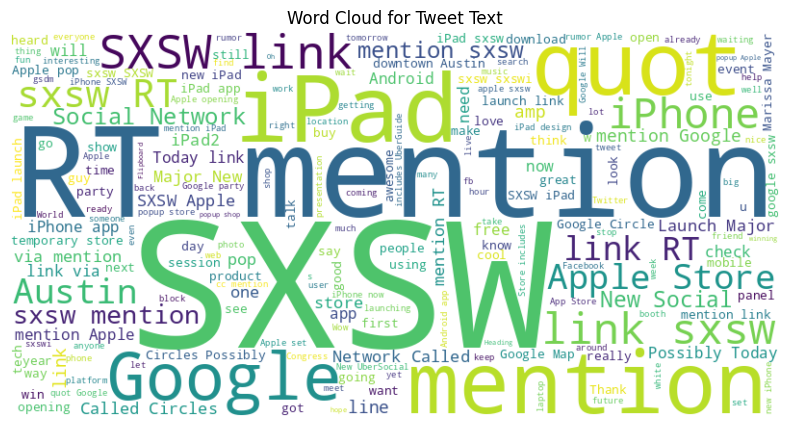

In [ ]:

# Word cloud for tweet text
text = ' '.join(df['tweet_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweet Text')
plt.show()

# Data Preprocessing

In [ ]:
# Handle missing
df['emotion_in_tweet_is_directed_at'].fillna('No product', inplace=True)
df['tweet_text'].fillna('No tweet', inplace=True)

# Define product and sentiment labels
products = ['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Android', 'Android App', 'Other Google Product or service', 'Other Apple Product or service', 'No Product']
sentiments = ['Negative emotion', 'Positive emotion', 'No emotion toward brand or product', "I can't tell"]

# Label the dataset
df['product_label'] = df['emotion_in_tweet_is_directed_at'].apply(lambda x: products.index(x) if x in products else -1)
df['sentiment_label'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].apply(lambda x: sentiments.index(x) if x in sentiments else -1)

# Split the dataset into training and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,product_label,sentiment_label
8307,Got a craving? #SXSW minds created an app for ...,iPad or iPhone App,Positive emotion,1,1
1744,It's not a rumor: Apple is opening up a tempor...,No product,No emotion toward brand or product,-1,2
1128,"Wow, this thing is insanely thin &amp; light. ...",iPad,Positive emotion,2,1
6156,RT @mention RT @mention Best thing I've heard ...,iPad,No emotion toward brand or product,2,2
7514,See Vanessa at the Mophie booth 1406 for iPad/...,No product,No emotion toward brand or product,-1,2


from matplotlib import pyplot as plt
_df_0['product_label'].plot(kind='hist', bins=20, title='product_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment_label'].plot(kind='hist', bins=20, title='sentiment_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('tweet_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('emotion_in_tweet_is_directed_at').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('is_there_an_emotion_directed_at_a_brand_or_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='product_label', y='sentiment_label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['product_label'].plot(kind='line', figsize=(8, 4), title='product_label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sentiment_label'].plot(kind='line', figsize=(8, 4), title='sentiment_label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emotion_in_tweet_is_directed_at'].value_counts()
    for x_label, grp in _df_8.groupby('tweet_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tweet_text')
_ = plt.ylabel('emotion_in_tweet_is_directed_at')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
    for x_label, grp in _df_9.groupby('emotion_in_tweet_is_directed_at')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('emotion_in_tweet_is_directed_at')
_ = plt.ylabel('is_there_an_emotion_directed_at_a_brand_or_product')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['tweet_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='product_label', y='tweet_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['emotion_in_tweet_is_directed_at'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='product_label', y='emotion_in_tweet_is_directed_at', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['is_there_an_emotion_directed_at_a_brand_or_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='product_label', y='is_there_an_emotion_directed_at_a_brand_or_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['tweet_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sentiment_label', y='tweet_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Save the labeled datasets to new CSV files
train_df.to_csv('train_dataset.csv', index=False)
valid_df.to_csv('valid_dataset.csv', index=False)

# Data Augmenatation

In [ ]:
# Additional imports for data augmentation
from nlpaug.augmenter.word import WordEmbsAug
from nlpaug.util import Action

# Data Augmentation
aug = WordEmbsAug(model_type='bert-base-uncased', action=Action.SUBSTITUTE)

# Apply data augmentation to text in the training dataset
train_df['augmented_tweet_text'] = train_df['tweet_text'].apply(lambda x: aug.augment(x))

# Combine original and augmented datasets
augmented_train_df = pd.concat([train_df[['augmented_tweet_text', 'product_label', 'sentiment_label']],
                                train_df[['tweet_text', 'product_label', 'sentiment_label']]], ignore_index=True)

# Fine Tuning using Tensorflow and Keras

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train_df['tweet_text']), truncation=True, padding=True)
valid_encodings = tokenizer(list(valid_df['tweet_text']), truncation=True, padding=True)

In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_encodings['input_ids'],
     'attention_mask': train_encodings['attention_mask'],
     'token_type_ids': train_encodings['token_type_ids']},
    {'product': train_df['product_label'].values, 'sentiment': train_df['sentiment_label'].values}
))

valid_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': valid_encodings['input_ids'],
     'attention_mask': valid_encodings['attention_mask'],
     'token_type_ids': valid_encodings['token_type_ids']},
    {'product': valid_df['product_label'].values, 'sentiment': valid_df['sentiment_label'].values}
))


In [ ]:
# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(products))

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss={'product': SparseCategoricalCrossentropy(from_logits=True),
                    'sentiment': SparseCategoricalCrossentropy(from_logits=True)},
              metrics={'product': SparseCategoricalAccuracy(),
                       'sentiment': SparseCategoricalAccuracy()})

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Load BERT tokenizer and encode the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_df['tweet_text']), truncation=True, padding=True)
valid_encodings = tokenizer(list(valid_df['tweet_text']), truncation=True, padding=True)

# Load pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(products))

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
history = model.fit(
    x={
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'token_type_ids': train_encodings['token_type_ids']
    },
    y={'product': train_df['product_label'].values, 'sentiment': train_df['sentiment_label'].values},
    epochs=3,
    validation_data=(
        {
            'input_ids': valid_encodings['input_ids'],
            'attention_mask': valid_encodings['attention_mask'],
            'token_type_ids': valid_encodings['token_type_ids']
        },
        {'product': valid_df['product_label'].values, 'sentiment': valid_df['sentiment_label'].values}
    )
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {'(<class \'list\'> containing values of types {\'(<class \\\'list\\\'> containing values of types {"<class \\\'int\\\'>"})\'})'} values), (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'numpy.ndarray'>"} values)

In [ ]:
# Tokenize and pad the text data with the correct max_length
train_texts = tokenizer(list(train_df['tweet_text']), padding=True, max_length=64, return_tensors="tf")
valid_texts = tokenizer(list(valid_df['tweet_text']), padding=True, max_length=64, return_tensors="tf")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
train_texts

{'input_ids': <tf.Tensor: shape=(6871, 64), dtype=int32, numpy=
array([[  101,  2288,  1037, ...,     0,     0,     0],
       [  101,  2009,  1005, ...,     0,     0,     0],
       [  101, 10166,  1010, ...,     0,     0,     0],
       ...,
       [  101, 19387,  1030, ...,     0,     0,     0],
       [  101,  2154,  1015, ...,     0,     0,     0],
       [  101,  1004, 22035, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(6871, 64), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(6871, 64), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

In [ ]:
# Encode emotions and products
label_encoder = LabelEncoder()
train_labels_emotion = label_encoder.fit_transform(train_df['emotion_in_tweet_is_directed_at'])
valid_labels_emotion = label_encoder.transform(valid_df['emotion_in_tweet_is_directed_at'])

label_encoder_product = LabelEncoder()
train_labels_product = label_encoder_product.fit_transform(train_df['is_there_an_emotion_directed_at_a_brand_or_product'])
valid_labels_product = label_encoder_product.transform(valid_df['is_there_an_emotion_directed_at_a_brand_or_product'])

In [ ]:
from transformers import AutoModel, AutoTokenizer
from tensorflow.keras import layers, models
import tensorflow as tf

# Build the model architecture using the functional API
input_layer = layers.Input(shape=(64,), dtype=tf.int32, name='input_ids')
token_type_ids = layers.Input(shape=(64,), dtype=tf.int32, name='token_type_ids')
attention_mask = layers.Input(shape=(64,), dtype=tf.int32, name='attention_mask')

# Using the TFAutoModel.from_pretrained(model_name) with pooler_layer=False
bert_output = TFAutoModel.from_pretrained(model_name)(
    {'input_ids': input_layer, 'token_type_ids': token_type_ids, 'attention_mask': attention_mask}
)['last_hidden_state']


pooled_output = layers.GlobalMaxPooling1D()(bert_output)

dense_layer = layers.Dense(128, activation='relu')(pooled_output)

emotion_output = layers.Dense(len(sentiments), activation='softmax', name='emotion_output')(dense_layer)
product_output = layers.Dense(len(products), activation='softmax', name='product_output')(dense_layer)

# Create the model
model = models.Model(inputs=[input_layer, token_type_ids, attention_mask], outputs=[emotion_output, product_output])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from tensorflow.keras import backend as K

def custom_sparse_categorical_crossentropy(y_true, y_pred):
    y_true = K.squeeze(K.one_hot(K.cast(y_true, 'int32'), K.int_shape(y_pred)[-1]), axis=-2)
    return K.categorical_crossentropy(y_true, y_pred)

# Compile the model with custom loss functions
model.compile(optimizer='adam',
              loss={'emotion_output': custom_sparse_categorical_crossentropy,
                    'product_output': custom_sparse_categorical_crossentropy},
              metrics={'emotion_output': 'accuracy', 'product_output': 'accuracy'})


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 64)]                 0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 64)]                 0         []                            
                                                                                                  
 token_type_ids (InputLayer  [(None, 64)]                 0         []                            
 )                                                                                                
                                                                                            

In [ ]:
# Train the model with validation data
model.fit({'input_ids': train_texts['input_ids'],
           'token_type_ids': train_texts['token_type_ids'],
           'attention_mask': train_texts['attention_mask']},
          {'emotion_output': train_labels_emotion, 'product_output': train_labels_product},
          validation_data=({'input_ids': valid_texts['input_ids'],
                            'token_type_ids': valid_texts['token_type_ids'],
                            'attention_mask': valid_texts['attention_mask']},
                           {'emotion_output': valid_labels_emotion, 'product_output': valid_labels_product}),
          epochs=10,
          batch_size=32)

Epoch 1/10


215/215 [==============================] - ETA: 0s - loss: 4.8200 - emotion_output_loss: 0.4293 - product_output_loss: 4.3907 - emotion_output_accuracy: 0.0422 - product_output_accuracy: 0.5156

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 64), found shape=(None, 58)


Here's an approach to evaluate a trained model:

**Make Predictions:**

Use the trained model to make predictions on the evaluation data.
Pass the tokenized input through the model and obtain predictions for both emotion and product outputs.

**Evaluate Emotion Predictions:**

Compare the predicted emotion labels with the true emotion labels.
Use appropriate evaluation metrics such as accuracy, precision, recall, and F1-score for emotion predictions.

**Evaluate Product Predictions:**

Compare the predicted product labels with the true product labels.
Use appropriate evaluation metrics such as accuracy, precision, recall, and F1-score for product predictions.

**Overall Model Performance:**

Consider the overall performance of the model by aggregating the metrics from both emotion and product predictions.
You may also calculate a weighted average of the metrics based on the importance of each task.

**Error Analysis:**

Examine misclassifications and errors made by the model.
Identify patterns in misclassifications and analyze whether there are specific types of tweets or emotions/products that are challenging for the model.

**Visualize Results:**

Create confusion matrices, precision-recall curves, or ROC curves to visually represent the model's performance.
Visualization can provide insights into class imbalances, highlight areas of improvement, and showcase the model's strengths.